## Imports

In [236]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats
import statistics
import seaborn as sns

In [159]:
df = pd.read_csv('tier1_tournament.csv')

### Preview

In [160]:
df.head()

,Unnamed: 0,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place
0,0,The International 2021,"Oct 07 - 17, 2021","$40,018,195",18 teams,"Bucharest, Romania",TSpirit,PSG.LGD
1,1,OGA Dota PIT Invitational,"Sep 06 - 10, 2021","$275,000",8 teams,Europe,PSG.LGD,TSpirit
2,2,ESL One Fall 2021,"Aug 21 - 29, 2021","$400,000",12 teams,Europe & CIS,Tundra,PSG.LGD
3,3,ESL One Summer 2021,"Jun 16 - 20, 2021","$400,000",12 teams,Europe,T1,VP
4,4,WePlay AniMajor,"Jun 02 - 13, 2021","$500,000",18 teams,"Kyiv, Ukraine",PSG.LGD,EG


### Cleaning

In [161]:
#Dropping Index from Excel
df1 = df.drop(['Unnamed: 0'], 1)
df1.head()

C:\Users\pittm\AppData\Local\Temp/ipykernel_9068/2641531135.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1 = df.drop(['Unnamed: 0'], 1)


,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place
0,The International 2021,"Oct 07 - 17, 2021","$40,018,195",18 teams,"Bucharest, Romania",TSpirit,PSG.LGD
1,OGA Dota PIT Invitational,"Sep 06 - 10, 2021","$275,000",8 teams,Europe,PSG.LGD,TSpirit
2,ESL One Fall 2021,"Aug 21 - 29, 2021","$400,000",12 teams,Europe & CIS,Tundra,PSG.LGD
3,ESL One Summer 2021,"Jun 16 - 20, 2021","$400,000",12 teams,Europe,T1,VP
4,WePlay AniMajor,"Jun 02 - 13, 2021","$500,000",18 teams,"Kyiv, Ukraine",PSG.LGD,EG


In [162]:
#Missing Data by Percent
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Tournament_Name - 0%
Date - 0%
Total_Prize - 0%
Num_Participants - 0%
Location - 0%
First_Place - 0%
Second_Place - 2%


In [163]:
# Changing the Num_Participants column data and name for consistency
df1.rename({'Num_Participants':'Teams'}, axis='columns', inplace = True)
#Removed "teams" & "$" from column
df1['Teams'] = df1['Teams'].str.replace('teams', '').replace(' ','')
df1['Total_Prize'] = df1['Total_Prize'].str.replace('$', '').replace(',','')
df1['Teams'] = df1['Teams'].str.replace(' ','')
df1['Total_Prize'] = df1['Total_Prize'].str.replace(',','')
df1.head()

C:\Users\pittm\AppData\Local\Temp/ipykernel_9068/982558586.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Total_Prize'] = df1['Total_Prize'].str.replace('$', '').replace(',','')


,Tournament_Name,Date,Total_Prize,Teams,Location,First_Place,Second_Place
0,The International 2021,"Oct 07 - 17, 2021",40018195,18,"Bucharest, Romania",TSpirit,PSG.LGD
1,OGA Dota PIT Invitational,"Sep 06 - 10, 2021",275000,8,Europe,PSG.LGD,TSpirit
2,ESL One Fall 2021,"Aug 21 - 29, 2021",400000,12,Europe & CIS,Tundra,PSG.LGD
3,ESL One Summer 2021,"Jun 16 - 20, 2021",400000,12,Europe,T1,VP
4,WePlay AniMajor,"Jun 02 - 13, 2021",500000,18,"Kyiv, Ukraine",PSG.LGD,EG


In [168]:
#Changing Data Types
convert_dict = {'Teams': float,
                'Total_Prize': float
               }
df2 = df1.astype(convert_dict, errors="ignore")

In [169]:
df2.head()

,Tournament_Name,Date,Total_Prize,Teams,Location,First_Place,Second_Place
0,The International 2021,"Oct 07 - 17, 2021",40018195.0,18.0,"Bucharest, Romania",TSpirit,PSG.LGD
1,OGA Dota PIT Invitational,"Sep 06 - 10, 2021",275000.0,8.0,Europe,PSG.LGD,TSpirit
2,ESL One Fall 2021,"Aug 21 - 29, 2021",400000.0,12.0,Europe & CIS,Tundra,PSG.LGD
3,ESL One Summer 2021,"Jun 16 - 20, 2021",400000.0,12.0,Europe,T1,VP
4,WePlay AniMajor,"Jun 02 - 13, 2021",500000.0,18.0,"Kyiv, Ukraine",PSG.LGD,EG


In [170]:
df2.dtypes

Tournament_Name     object
Date                object
Total_Prize        float64
Teams              float64
Location            object
First_Place         object
Second_Place        object
dtype: object

## Estimates of Location

In [175]:
# Mean of Teams
df2['Total_Prize'].mean()

1620735.5578231292

In [173]:
#Weighted Mean
#np.average(df2["Total_Prize"], weights=df2["Teams"])
#Not sure useful

2298961.7018954623

In [176]:
# Trimmed Mean of Prize

scipy.stats.trim_mean(df2["Total_Prize"], 0.1)

355821.06722689077

In [179]:
# Median of Prize
# Better representation on than Mean

df2["Total_Prize"].median()

195274.0

In [181]:
#Percentile
q3 = np.percentile(df2["Total_Prize"],75)
q1 = np.percentile(df2["Total_Prize"],25)

## Estimates of Variability

In [184]:
# Variance
statistics.variance(df2["Total_Prize"])

31833306971719.305

In [185]:
#Standard Deviation

statistics.stdev(df2["Total_Prize"])

5642101.290451927

In [186]:
# Manhattan Norm

np.mean(np.absolute(df2["Total_Prize"]) - np.mean(df2["Total_Prize"]))

0.0

In [187]:
#Median Absolute Deviation

np.median(np.absolute(df2["Total_Prize"]) - np.median(df2["Total_Prize"]))

0.0

In [188]:
#Interquartile Range

iqr = q3 - q1
iqr

588176.5

## Exploring the Data Distribution

<AxesSubplot:>

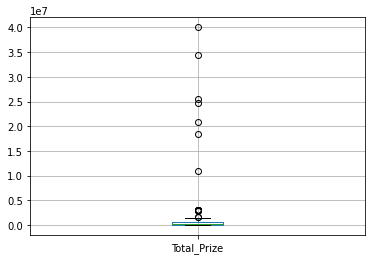

In [196]:
# Box Plot for Prize

df2.boxplot("Total_Prize", None,None)

<AxesSubplot:>

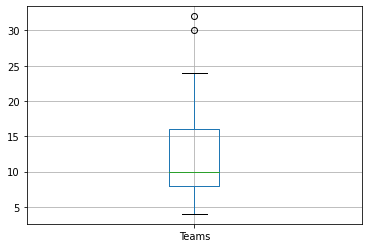

In [197]:
#Box Plot for Teams
df2.boxplot("Teams", None,None)

In [199]:
# Frequency Table
'''
freq_table = df2.copy()
freq_table["freq"] = pd.cut(df2["Total_Prize"],10)
freq_table.groupby("freq")["Placement"].count().reset_index()
'''
#Need to make a placement or rank column for number of times a team as been in 1st, maybe 2nd


0      (36017375.5, 40018195.0]
1       (-30008.195, 4010819.5]
2       (-30008.195, 4010819.5]
3       (-30008.195, 4010819.5]
4       (-30008.195, 4010819.5]
                 ...           
142     (-30008.195, 4010819.5]
143     (-30008.195, 4010819.5]
144     (-30008.195, 4010819.5]
145     (-30008.195, 4010819.5]
146     (-30008.195, 4010819.5]
Name: Total_Prize, Length: 147, dtype: category
Categories (10, interval[float64, right]): [(-30008.195, 4010819.5] < (4010819.5, 8011639.0] < (8011639.0, 12012458.5] < (12012458.5, 16013278.0] ... (24014917.0, 28015736.5] < (28015736.5, 32016556.0] < (32016556.0, 36017375.5] < (36017375.5, 40018195.0]]

(array([140.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   2.,   0.,   0.,
          1.,   1.]),
 array([1.00000000e+04, 3.08755346e+06, 6.16510692e+06, 9.24266038e+06,
        1.23202138e+07, 1.53977673e+07, 1.84753208e+07, 2.15528742e+07,
        2.46304277e+07, 2.77079812e+07, 3.07855346e+07, 3.38630881e+07,
        3.69406415e+07, 4.00181950e+07]),
 <BarContainer object of 13 artists>)

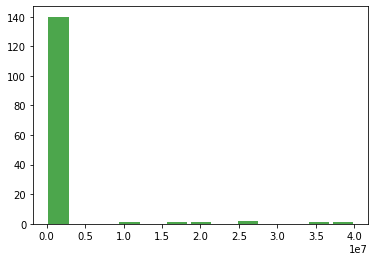

In [205]:
# Histogram
mpl.pyplot.hist(x=df2["Total_Prize"], bins= 'doane', color='green',alpha=0.7,rwidth=0.85)

# y is number of tournaments , x is prize money

C:\Users\pittm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'Total Prizes per Tournament')

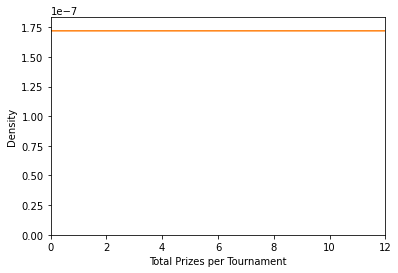

In [207]:
# Density Plot
# Need to tinker
"""ax = df2["Total_Prize"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df2["Total_Prize"].plot.density(ax=ax)
ax.set_xlabel("Total Prizes per Tournament")"""


## Binary and Categorical Data

In [209]:
df2["Total_Prize"].mode()

0    1000000.0
dtype: float64

Text(0, 0.5, 'Prize Money in Millions')

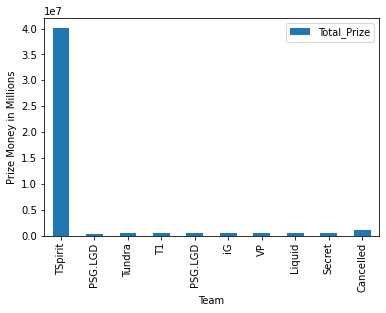

In [224]:
#Bar Chart

ax = df2.iloc[:10].plot.bar(x="First_Place", y="Total_Prize", legend=True)
ax.set_xlabel('Team')
ax.set_ylabel('Prize Money in Millions')

(-1.1063546469753431,
 1.1071562133179818,
 -1.1083199747016068,
 1.100396189271505)

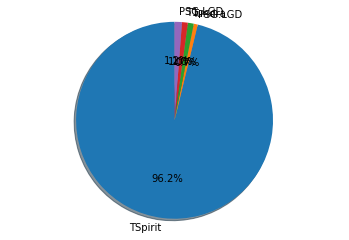

In [232]:
#Pie Chart
#Gross but this is practice

pie_data = df2.iloc[:5]
mpl.pyplot.pie(pie_data["Total_Prize"], labels=pie_data["First_Place"],autopct='%1.1f%%', shadow=True, startangle=90)
mpl.pyplot.axis('equal')

## Correlation

Not going to complete unless I add more fields


In [235]:
# Scatter? maybe for placement and prize?

"""df2.plot.scatter(x="Placement", y="Total_Prize")"""

'df2.plot.scatter(x="Placement", y="Total_Prize")'

<AxesSubplot:xlabel='Teams'>

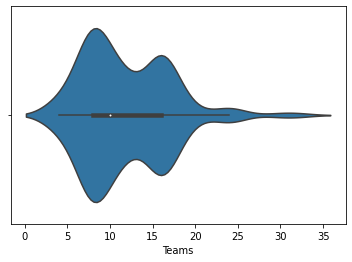

In [237]:
#Violin Plot
sns.violinplot(x=df2["Teams"])